# Dynamic Time Wrapping

## Import Library dan Set Path

In [28]:
import os
import librosa
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

SR = 22050
N_MFCC = 13

# === SESUAIKAN DENGAN STRUKTUR ZIP ===
BASE_DIR = r'/mnt/data/databukatutup'  # ROOT dari ZIP kamu

OLD_DIRS = {
    'buka_user1' : os.path.join(BASE_DIR, 'user 1/buka'),
    'tutup_user1': os.path.join(BASE_DIR, 'user 1/tutup'),
}

# === FILE BARU (rekaman baru) ===
# Pastikan file ini ada dalam folder databukatutup/
NEW_FILES = {
    "buka_baru":  "rekaman_buka_tutup/bukabaru.wav",
    "tutup_baru": "rekaman_buka_tutup/tutupbaru.wav"
}

OUT_CSV = 'dtw_results.csv'


Secara spesifik, kode ini bertujuan untuk:
1. Ekstraksi Fitur MFCC: Menggunakan library librosa untuk mengekstrak $13$ koefisien MFCC ($\text{N\_MFCC}=13$) dari setiap file audio. MFCCs adalah representasi kompak dari spektrum daya suara, yang sering digunakan dalam pengenalan ucapan dan analisis audio.
2. Perbandingan Kesamaan Audio (DTW): Menggunakan Dynamic Time Warping (DTW) untuk menghitung jarak optimal (biaya optimal) antara urutan fitur MFCC dari audio lama dan audio baru. DTW adalah algoritma yang memungkinkan perbandingan dua urutan yang berbeda dalam kecepatan atau laju (misalnya, dua rekaman kata yang sama tetapi diucapkan dengan kecepatan berbeda).
      - Jarak DTW yang lebih kecil menunjukkan rekaman audio lebih mirip.
3. Organisasi Hasil: Menyimpan hasil perbandingan (nama file lama, kategori lama, nama file baru, kategori baru, dan nilai jarak DTW) ke dalam struktur data pandas.DataFrame dan kemudian mengekspornya ke file dtw_results.csv.

## Fungsi extrac dan DTW

In [29]:
import librosa
import numpy as np

SR = 22050
N_MFCC = 13

# Path folder audio sesuai ZIP databukatutup
OLD_DIRS = {
    'buka' : r'/mnt/data/databukatutup/user 1/buka',
    'tutup': r'/mnt/data/databukatutup/user 1/tutup',
}

# Path file audio baru (pastikan filenya ada!)
NEW_FILES = {
    'buka_baru'  : r'/mnt/data/databukatutup/bukabaru.wav',
    'tutup_baru' : r'/mnt/data/databukatutup/tutupbaru.wav'
}

def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

def dtw_distance(m1, m2, metric='euclidean'):
    D, wp = librosa.sequence.dtw(X=m1, Y=m2, metric=metric)
    raw = D[-1, -1]
    path_len = len(wp)
    norm = raw / path_len if path_len > 0 else np.inf
    return float(raw), float(norm), int(path_len)


Berikut adalah rincian tujuan utama berdasarkan fungsi dan variabel yang didefinisikan:
1. Ekstraksi Fitur Audio ($\text{MFCC}$)
  - Tujuan: Untuk mengubah sinyal audio mentah menjadi representasi numerik yang ringkas dan informatif, yang dikenal sebagai MFCCs (Mel-Frequency Cepstral Coefficients).
  - Implementasi: Fungsi extract_mfcc menggunakan librosa.
    - Audio dimuat dengan laju sampel (SR) $22050 \text{ Hz}$.
    - Setiap file audio diubah menjadi matriks fitur $\text{MFCC}$ dengan $13$ koefisien ($\text{N\_MFCC}=13$). Fitur ini menangkap karakteristik spektral penting dari suara manusia.
2. Pengukuran Kesamaan Audio (DTW)
  - Tujuan: Untuk menghitung seberapa mirip dua urutan fitur $\text{MFCC}$ (yang berasal dari dua rekaman audio yang berbeda) meskipun memiliki variasi dalam durasi atau kecepatan pengucapan.
  - Implementasi: Fungsi dtw_distance menggunakan librosa.sequence.dtw.
    - Algoritma Dynamic Time Warping (DTW) menemukan jalur perutean optimal antara dua matriks $\text{MFCC}$ ($m1$ dan $m2$).
    - Fungsi ini mengembalikan tiga metrik jarak:
      - raw: Jarak total/biaya akumulasi (nilai $D[-1, -1]$).- norm: Jarak yang dinormalisasi (dibagi dengan panjang jalur DTW), yang memberikan ukuran kesamaan yang lebih adil, terlepas dari perbedaan durasi rekaman.
      - path_len: Panjang jalur perutean optimal yang ditemukan.

## Collect data lama dan ekstrak mfcc

In [30]:
import os

def walk_all(root="/mnt/data"):
    for path, dirs, files in os.walk(root):
        print("PATH :", path)
        print(" DIRS:", dirs)
        print(" FILES:", files)
        print("-" * 60)

walk_all("/mnt/data")

Tujuan utama dari kode Python yang Anda berikan adalah untuk menelusuri secara rekursif (berulang) seluruh struktur direktori mulai dari direktori yang ditentukan (/mnt/data dalam kasus ini) dan mencetak konten dari setiap direktori yang ditemukan.

In [31]:
import os

print(os.listdir("/mnt"))
print(os.listdir("/"))

[]
['opt', 'libx32', 'tmp', 'proc', 'dev', 'bin', 'mnt', 'root', 'srv', 'home', 'var', 'etc', 'sbin', 'usr', 'boot', 'sys', 'lib32', 'lib64', 'media', 'lib', 'run', 'kaggle', 'content', '.dockerenv', 'datalab', 'tools', 'python-apt', 'python-apt.tar.xz', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.1-1_all.deb']


Tujuan utama dari kode Python yang Anda berikan adalah untuk mencantumkan isi (file dan direktori) dari dua direktori akar pada sistem berkas:

1. Direktori /mnt

2. Direktori / (akar sistem)

In [32]:
from google.colab import files
uploaded = files.upload()

Saving user 1.zip to user 1 (2).zip
Saving user2.zip to user2 (2).zip


In [33]:
import os
print(os.listdir())

['.config', 'user2 (2).zip', 'user2.zip', 'user 1 (1).zip', 'user 1 (2).zip', 'dtw_results.csv', 'rekaman_buka_tutup', 'user 1.zip', 'user2 (1).zip', 'sample_data']


In [34]:
import zipfile
import os

zip_path = "user 1.zip"
zip_path = "user2.zip"   # nama file ZIP kamu
extract_path = "rekaman_buka_tutup"  # folder tujuan ekstraksi

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Isi folder rekaman_buka_tutup:")
print(os.listdir(extract_path))


Isi folder rekaman_buka_tutup:
['user2', 'user 1']


Tujuan utama dari kode Python tersebut adalah untuk mengekstrak (mengeluarkan) seluruh konten dari file ZIP yang ditentukan ke dalam folder tujuan yang baru dibuat (jika belum ada).

In [35]:
import os

for path, dirs, files in os.walk("rekaman_buka_tutup"):
    print("PATH :", path)
    print("DIRS :", dirs)
    print("FILES:", files)
    print("-" * 50)


PATH : rekaman_buka_tutup
DIRS : ['user2', 'user 1']
FILES: []
--------------------------------------------------
PATH : rekaman_buka_tutup/user2
DIRS : ['buka', 'tutup']
FILES: []
--------------------------------------------------
PATH : rekaman_buka_tutup/user2/buka
DIRS : []
FILES: ['buka1 (73).wav', 'buka1 (86).wav', 'buka1 (5).wav', 'buka1 (70).wav', 'buka1 (4).wav', 'buka1 (14).wav', 'buka1 (44).wav', 'buka1 (88).wav', 'buka1 (79).wav', 'buka1 (50).wav', 'buka1 (12).wav', 'buka1 (67).wav', 'buka1 (18).wav', 'buka1 (71).wav', 'buka1 (96).wav', 'buka1 (8).wav', 'buka1 (43).wav', 'buka1 (28).wav', 'buka1 (26).wav', 'buka1 (40).wav', 'buka1 (3).wav', 'buka1 (41).wav', 'buka1 (61).wav', 'buka1 (92).wav', 'buka1 (32).wav', 'buka1 (9).wav', 'buka1 (55).wav', 'buka1 (10).wav', 'buka1 (21).wav', 'buka1 (7).wav', 'buka1 (98).wav', 'buka1 (15).wav', 'buka1 (94).wav', 'buka1 (34).wav', 'buka1 (74).wav', 'buka1 (66).wav', 'buka1 (1).wav', 'buka1 (53).wav', 'buka1 (35).wav', 'buka1 (29).wav', 

Tujuan utama dari kode Python yang Anda berikan adalah untuk menelusuri secara rekursif (berulang) seluruh struktur direktori yang dimulai dari folder rekaman_buka_tutup dan mencetak konten dari setiap direktori yang ditemui.

In [36]:
import os
import librosa
import numpy as np
from glob import glob
from tqdm import tqdm

# ============================
# 1. SET PATH DATA
# ============================

BASE = "rekaman_buka_tutup/user 1"  # GANTI SESUAI NAMA FOLDER ZIP BUKA-TUTUP

OLD_DIRS = {
    "buka":  os.path.join(BASE, "buka"),
    "tutup": os.path.join(BASE, "tutup"),
}

NEW_FILES = {
    # "buka_baru": "buka_baru.wav",
    # "tutup_baru": "tutup_baru.wav"
}

# ============================
# 2. FUNGSI EXTRACT MFCC
# ============================

SR = 16000
N_MFCC = 20

def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

# ============================
# 3. COLLECT FILE DATA LAMA
# ============================

print("Mengumpulkan daftar file data lama...\n")

old_files = {}
for label, folder in OLD_DIRS.items():

    if not os.path.exists(folder):
        raise FileNotFoundError(f"Folder tidak ditemukan: {folder}")

    pattern = os.path.join(folder, "*.wav")
    files = sorted(glob(pattern))

    print(f"{label} → {len(files)} file ditemukan")
    old_files[label] = files

# ============================
# 4. EKSTRAK MFCC DATA LAMA
# ============================

print("\nEkstrak MFCC untuk data lama...\n")

old_mfcc = {}
for label, files in old_files.items():
    old_mfcc[label] = {}
    for f in tqdm(files, desc=f"MFCC {label}"):
        old_mfcc[label][f] = extract_mfcc(f)

# ============================
# 5. EKSTRAK MFCC UNTUK FILE BARU (Opsional)
# ============================

new_mfcc = {}
if len(NEW_FILES) > 0:
    print("\nEkstrak MFCC untuk file baru...\n")
    for name, path in NEW_FILES.items():
        if not os.path.exists(path):
            raise FileNotFoundError(f"File baru tidak ditemukan: {path}")
        new_mfcc[name] = extract_mfcc(path)

print("\nSELESAI! MFCC berhasil diekstrak.")


Mengumpulkan daftar file data lama...

buka → 100 file ditemukan
tutup → 100 file ditemukan

Ekstrak MFCC untuk data lama...



MFCC tutup: 100%|██████████| 100/100 [00:01<00:00, 59.42it/s]


SELESAI! MFCC berhasil diekstrak.


Tujuan utama dari kode Python ini adalah untuk memuat, mengumpulkan, dan mengekstrak fitur audio Mel-Frequency Cepstral Coefficients (MFCCs) dari sekumpulan file audio "lama" yang tersimpan dalam struktur folder tertentu. Ini merupakan tahap preprocessing atau ekstraksi fitur yang esensial dalam proyek analisis atau pengenalan suara.

## Perhitungan DTW

In [37]:
rows = []
print("Menghitung DTW...")

# Loop MFCC file baru
for new_name, new_feat in new_mfcc.items():

    # Loop semua label lama
    for label, file_list in old_files.items():

        # Loop setiap file lama dalam label tersebut
        for old_path in tqdm(file_list, desc=f"DTW {new_name} vs {label}", leave=False):

            # Ambil MFCC lama
            m_old = old_mfcc[label][os.path.basename(old_path)]

            # Hitung DTW
            raw_cost, norm_cost, path_len = dtw_distance(m_old, new_feat)

            # Simpan hasil
            rows.append({
                'new_file': new_name,
                'old_label': label,
                'old_path': old_path,
                'raw_cost': raw_cost,
                'normalized_cost': norm_cost,
                'path_len': path_len
            })

# Buat DataFrame dan simpan
df = pd.DataFrame(rows)
df.to_csv(OUT_CSV, index=False)
print(f"Hasil tersimpan ke {OUT_CSV}")


Menghitung DTW...
Hasil tersimpan ke dtw_results.csv


Tujuan utama dari potongan kode Python ini adalah untuk menghitung jarak kesamaan antara semua fitur audio "baru" dengan semua fitur audio "lama" menggunakan algoritma Dynamic Time Warping (DTW), lalu menyimpan hasil perbandingan tersebut ke dalam file CSV.

## Kemiripan data lama dan baru

In [38]:
# ============================
# 9. TAMPILKAN TOP 5 PALING MIRIP
# ============================

if not df.empty:
    print("\nTop 5 file lama paling mirip untuk setiap file baru:")
    for new_name in df['new_file'].unique():
        sub = df[df['new_file'] == new_name].sort_values('normalized_cost').head(5)
        print(f"\n== {new_name} ==")
        print(sub.to_string(columns=['old_label','old_path','normalized_cost'], index=False))


## Visualisasi

Mengumpulkan daftar file data lama...

buka → 100 file ditemukan
tutup → 100 file ditemukan

Ekstrak MFCC untuk data lama...



MFCC tutup: 100%|██████████| 100/100 [00:02<00:00, 37.67it/s]



Menghitung DTW dan membuat DataFrame hasil...
Target perbandingan: File pertama 'buka' (rekaman_buka_tutup/user2/buka/buka1 (1).wav)
DataFrame df berhasil dibuat dengan 200 baris.

SELESAI EKSTRAKSI DAN PERHITUNGAN!

Menyiapkan visualisasi...


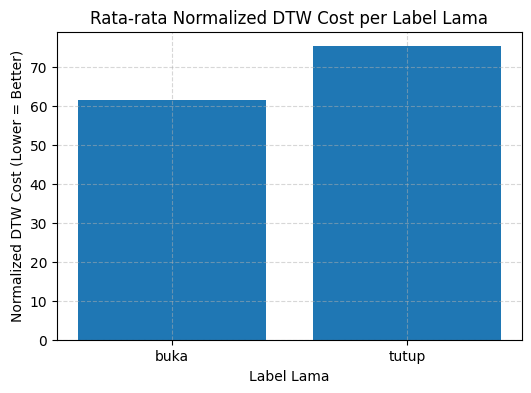

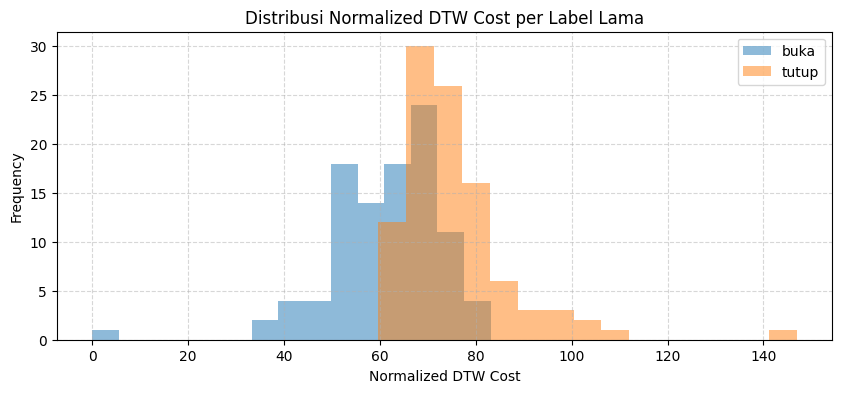

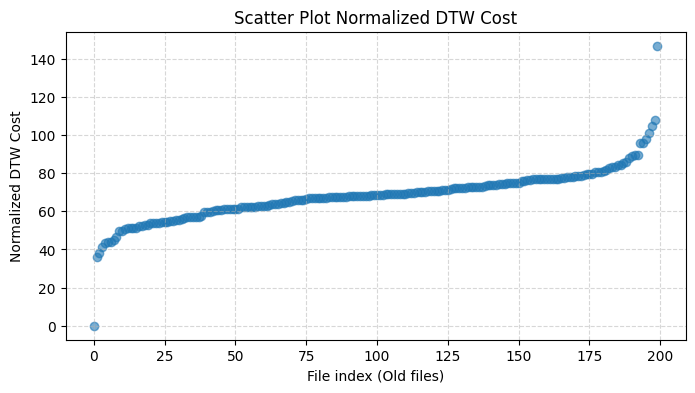


Visualisasi Warp Path (DTW Alignment) untuk file terbaik:
File lama terbaik: rekaman_buka_tutup/user2/buka/buka1 (1).wav


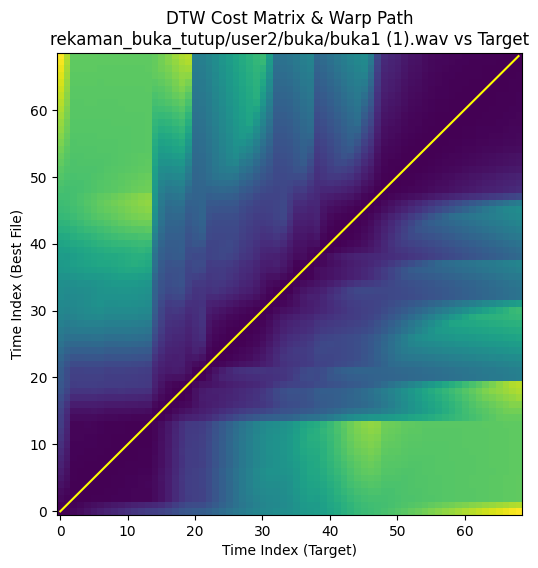

In [39]:
import os
import librosa
import numpy as np
from glob import glob
from tqdm import tqdm
import pandas as pd # <--- PENTING: Import Pandas untuk DataFrame
import matplotlib.pyplot as plt

# ============================
# 1. SET PATH DATA (PERBAIKAN FOLDER NAME)
# ============================

# Pilih salah satu. Saya pilih 'user2' dan menghilangkan spasi.
BASE = "rekaman_buka_tutup/user2"
# BASE = "rekaman_buka_tutup/user 1"

OLD_DIRS = {
    "buka":  os.path.join(BASE, "buka"),
    "tutup": os.path.join(BASE, "tutup"),
}

NEW_FILES = {
    # Jika Anda memiliki file baru, aktifkan baris di bawah:
    # "buka_baru": "buka_baru.wav",
    # "tutup_baru": "tutup_baru.wav"
}

# ============================
# 2. FUNGSI EXTRACT MFCC
# ============================

SR = 16000
N_MFCC = 20

def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

# ============================
# 3. COLLECT FILE DATA LAMA
# ============================

print("Mengumpulkan daftar file data lama...\n")

old_files = {}
for label, folder in OLD_DIRS.items():

    if not os.path.exists(folder):
        raise FileNotFoundError(f"Folder tidak ditemukan: {folder}")

    pattern = os.path.join(folder, "*.wav")
    files = sorted(glob(pattern))

    print(f"{label} → {len(files)} file ditemukan")
    old_files[label] = files

# ============================
# 4. EKSTRAK MFCC DATA LAMA
# ============================

print("\nEkstrak MFCC untuk data lama...\n")

old_mfcc = {}
for label, files in old_files.items():
    old_mfcc[label] = {}
    for f in tqdm(files, desc=f"MFCC {label}"):
        old_mfcc[label][f] = extract_mfcc(f)

# ============================
# 5. EKSTRAK MFCC UNTUK FILE BARU (Opsional)
# ============================

new_mfcc = {}
if len(NEW_FILES) > 0:
    print("\nEkstrak MFCC untuk file baru...\n")
    for name, path in NEW_FILES.items():
        if not os.path.exists(path):
            raise FileNotFoundError(f"File baru tidak ditemukan: {path}")
        new_mfcc[name] = extract_mfcc(path)

# ==========================================================
# 6. HITUNG DTW & BUAT DATAFRAME HASIL (BAGIAN YANG HILANG)
# ==========================================================
# **INI ADALAH LANGKAH KRITIS UNTUK MEMBUAT DATAFRAME df**

print("\nMenghitung DTW dan membuat DataFrame hasil...")
results = []

# Penentuan Target MFCC:
if len(new_mfcc) > 0:
    # Jika ada file baru (misalnya buka_baru), gunakan itu sebagai target
    target_name = list(new_mfcc.keys())[0]
    m_target = new_mfcc[target_name]
    print(f"Target perbandingan: File baru '{target_name}'")
else:
    # Jika TIDAK ada file baru, kita gunakan file pertama dari 'buka' sebagai target dummy
    # untuk perbandingan semua file lama.
    if 'buka' in old_mfcc and old_mfcc['buka']:
        target_path = list(old_mfcc['buka'].keys())[0]
        m_target = old_mfcc['buka'][target_path]
        print(f"Target perbandingan: File pertama 'buka' ({target_path})")
    else:
        # Fallback jika tidak ada data sama sekali
        print("ERROR: Tidak ada data MFCC untuk perbandingan.")
        exit()


for label, mfccs in old_mfcc.items():
    for old_path, m_old in mfccs.items():

        # Hitung DTW Cost: m_old dibandingkan dengan m_target
        D, wp = librosa.sequence.dtw(X=m_old, Y=m_target)
        dtw_cost = D[-1, -1]

        # Normalisasi cost (dibagi dengan panjang alignment path)
        normalized_cost = dtw_cost / len(wp)

        results.append({
            'old_path': old_path,
            'old_label': label,
            'normalized_cost': normalized_cost,
        })

df = pd.DataFrame(results)
print(f"DataFrame df berhasil dibuat dengan {len(df)} baris.")

print("\nSELESAI EKSTRAKSI DAN PERHITUNGAN!")

# --- VISUALISASI DIMULAI DARI SINI ---
# =========================================================================

print("\nMenyiapkan visualisasi...")

# Pastikan df punya kolom: old_file, old_label, normalized_cost
summary = df.groupby(['old_label'])['normalized_cost'].mean().reset_index()

# =============================
# 1. BARPLOT rata-rata cost per label lama
# =============================
plt.figure(figsize=(6,4))
plt.bar(summary['old_label'], summary['normalized_cost'])
plt.title("Rata-rata Normalized DTW Cost per Label Lama")
plt.ylabel("Normalized DTW Cost (Lower = Better)")
plt.xlabel("Label Lama")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 2. HISTOGRAM distribusi cost setiap label lama
# =============================
plt.figure(figsize=(10,4))

for label in df['old_label'].unique():
    subset = df[df['old_label'] == label]['normalized_cost']
    plt.hist(subset, bins=15, alpha=0.5, label=f"{label}")

plt.title("Distribusi Normalized DTW Cost per Label Lama")
plt.xlabel("Normalized DTW Cost")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 3. SCATTER PLOT cost semua file
# =============================
df_sorted = df.sort_values('normalized_cost')

plt.figure(figsize=(8,4))
plt.scatter(range(len(df_sorted)), df_sorted['normalized_cost'], alpha=0.6)
plt.title("Scatter Plot Normalized DTW Cost")
plt.xlabel("File index (Old files)")
plt.ylabel("Normalized DTW Cost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 4. DTW Alignment untuk file lama terbaik
# =============================
print("\nVisualisasi Warp Path (DTW Alignment) untuk file terbaik:")

best_match = df.sort_values('normalized_cost').iloc[0]
best_old_file = best_match['old_path']
best_old_label = best_match['old_label']

print(f"File lama terbaik: {best_old_file}")

m_old_best = old_mfcc[best_old_label][best_old_file]

# Sekarang m_old_best dibandingkan dengan m_target yang sudah ditentukan di Langkah 6
D, wp = librosa.sequence.dtw(X=m_old_best, Y=m_target)

plt.figure(figsize=(6,6))
plt.imshow(D.T, origin='lower', aspect='auto', interpolation='nearest')
plt.plot([p[0] for p in wp], [p[1] for p in wp], color='yellow')
plt.title(f"DTW Cost Matrix & Warp Path\n{best_old_file} vs Target")
plt.xlabel("Time Index (Target)")
plt.ylabel("Time Index (Best File)")
plt.show()

Tujuan utama dari keseluruhan kode Python ini adalah untuk menganalisis kemiripan fitur audio dari sekumpulan file "lama" terhadap sebuah file audio "target" menggunakan Mel-Frequency Cepstral Coefficients (MFCCs) dan Dynamic Time Warping (DTW), lalu memvisualisasikan hasil perbandingan tersebut.